# Análise Exploratória dos tweets de desastre


## Dataset 

Esse dataset contém 5 colunas:
* **ID:** ID do tweet
* **Keyword**: Uma palavra chave do tweet (pode estar em branco)
* **Location:** A localização de onde o tweet foi postado(pode estar em branco)
* **Text:** coluna onde estão os tweets
* **Target:** mostra se o tweet fala de uma **desastre real (1)** ou **falso (0)**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 

Vamos dar uma olhada no nosso Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = df_train = pd.read_csv('/content/drive/Shared drives/Grupo Turing/P&D/Áreas de Foco/NLP/Materiais/Aulas 2020/Aula Transfer Learning Word2Vec/datasets/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Vamos ver um tweet específico, no caso o da linha 4:

In [ ]:
df['text'][4]

'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

### Checando nossos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.isnull().sum() # colunas com dados vazios

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
df.nunique() # valores únicos por coluna

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [ ]:
print("keyword", df.keyword.unique())

keyword [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced

In [ ]:
print("location", df.location.unique())

location [nan 'Birmingham' 'Est. September 2012 - Bristol' ... 'Vancouver, Canada'
 'London ' 'Lincoln']


### Removendo duplicatas e dados nulos

In [ ]:
df = df.drop_duplicates('id', keep="last")

In [ ]:
df.dropna(inplace=True)

## Análise

### Análise da Target

Antes de analisar a target vou criar uma nova coluna para vermos se o desastre é real ou falso, ao invés de 0 ou 1:

In [ ]:
def muda_target(num):
  if num == 0:
    return 'Desastre Real'
 
  return 'Desastre Falso'

In [ ]:
 df['new_target'] = df['target'].apply(muda_target)
 df['new_target']

31      Desastre Falso
32       Desastre Real
33      Desastre Falso
34       Desastre Real
35       Desastre Real
             ...      
7575     Desastre Real
7577     Desastre Real
7579     Desastre Real
7580     Desastre Real
7581     Desastre Real
Name: new_target, Length: 5080, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


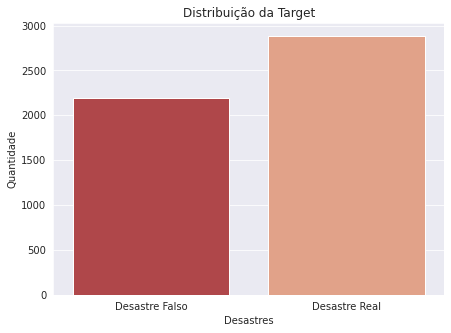

In [ ]:
plt.figure(figsize=(7,5))

sns.set_palette('RdBu')
sns.set_style('darkgrid')

s = sns.countplot(df['new_target'])
s.set_title('Distribuição da Target')
s.set(xlabel='Desastres', ylabel='Quantidade')

plt.show()

Podemos ver que os tweets falsos são a maioria, no caso, o dataset contém cerca de 1000 tweets falsos a mais do que reais.

### Análise exploratória dos tweeets

Antes de pré-processar o texto, vamos fazer uma primeira análise exploratória da coluna 'text', onde estão os tweets.

#### Número de caracteres dos tweets

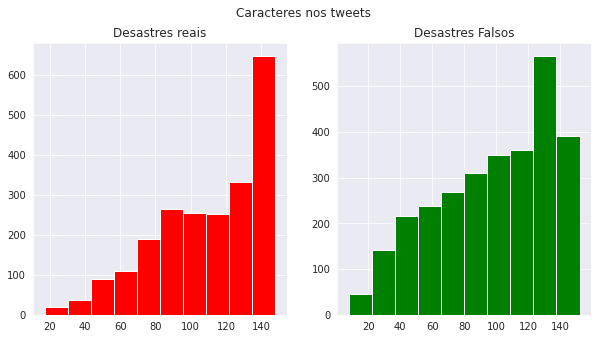

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Desastres reais')
tweet_len=df[df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Desastres Falsos')
fig.suptitle('Caracteres nos tweets')

plt.show()

Oa números aqui nesse caso parecem estar distribuídos de forma bem similar.

#### Número de palavras

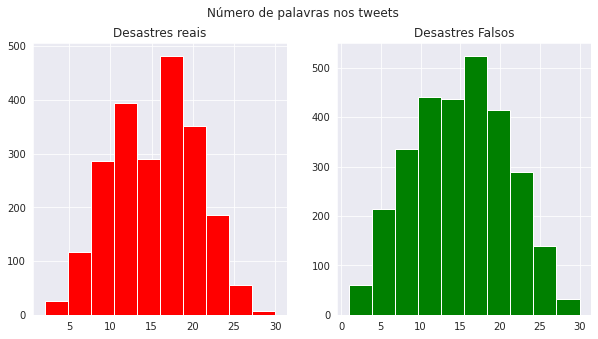

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Desastres reais')
tweet_len=df[df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Desastres Falsos')
fig.suptitle('Número de palavras nos tweets')
plt.show()

No caso de números de palavras também não vemos muitas diferenças.

#### Tamanho de palavras

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


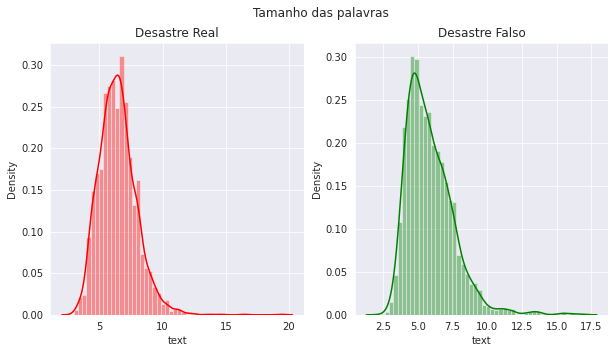

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Desastre Real')
word=df[df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Desastre Falso')
fig.suptitle('Tamanho das palavras')
plt.show()

#### Tokens/Stopwords mais comuns

In [ ]:
tokens = []

for linha in df['text']:
  tokens += linha.split()

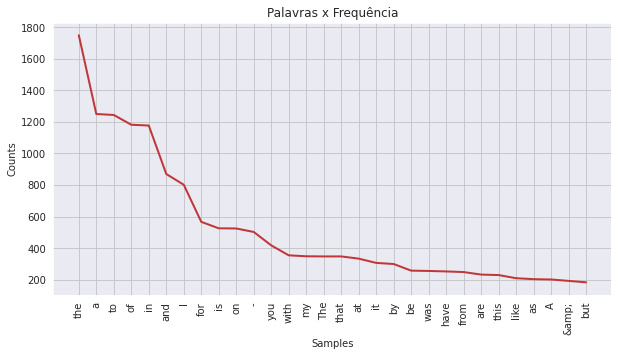

In [ ]:
plt.figure(figsize=(10,5))
fd = nltk.FreqDist(tokens)
fd.plot(30,title = "Palavras x Frequência")

#### Bigramas mais comuns

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def top_ngramas(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


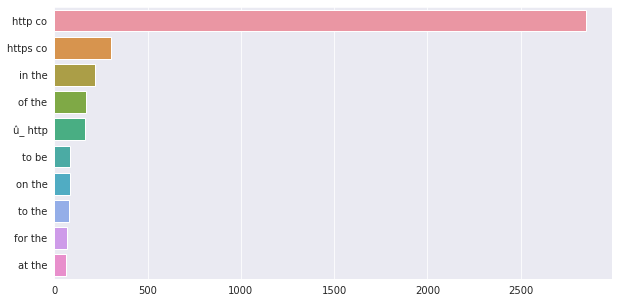

In [ ]:
tt_top_bigramas = top_ngramas(df['text'], 2)
x,y=map(list,zip(*tt_top_bigramas))
fig = plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)
plt.show()

## Pré-processamento

Antes de continuarmos a análise vamos pré-processar nossos tweets, peguei parte do código do pré-processamento que a Camilala, a Lu e a Ju fizeram para a aulinha de EDA dos tweets do corona, obrigada meninas <3 

In [ ]:
import nltk
import spacy
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
spc = spacy.load('en')

In [ ]:
def limpa_tweets(texto):
   # Remove links e '<user>' e converte para letra minuscula
    sem_links = re.sub(r"http\S+", "", texto.lower())
    sem_user = re.sub("<user>", "", sem_links)

    # Remove caracteres que nao sao letras e tokeniza
    tokens =  re.findall(r'\b[A-zÀ-úü]+\b', sem_user)
    
    # Remove stopwords
    stopw = nltk.corpus.stopwords.words('english')
    stopw_set = set(stopw)

    sem_stopwords = [w for w in tokens if w not in stopw_set]

    junta_texto = " ".join(sem_stopwords)

    # Instanciando o objeto spacy
    spc_letras =  spc(junta_texto)

    # Lemmização 
    lemma = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]
  
    # juntando os tokens 
    tweets_processados = " ".join(lemma)
  
    return tweets_processados

In [ ]:
df['text'] = df['text'].apply(limpa_tweets)

In [ ]:
df.head()

,id,keyword,location,text,target,new_target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze,1,Desastre Falso
32,49,ablaze,Est. September 2012 - Bristol,always try bring heavy metal rt,0,Desastre Real
33,50,ablaze,AFRICA,africanbaze break news nigeria flag set ablaze...,1,Desastre Falso
34,52,ablaze,"Philadelphia, PA",cry set ablaze,0,Desastre Real
35,53,ablaze,"London, UK",plus side look sky last night ablaze,0,Desastre Real


### Análise exploratória pós pré-processamento

Agora que já realizamos o pré-processamento vamos analisar novamente algumas coisas e ver se temos mudança nos resultados:

#### Número de palavras

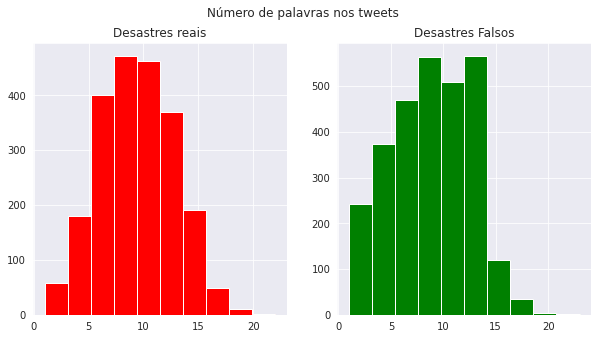

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Desastres reais')
tweet_len=df[df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Desastres Falsos')
fig.suptitle('Número de palavras nos tweets')
plt.show()

Uau. Esses gráficos mudaram BASTANTE pré-processamento. Fica bem claro que tweets falso possuem mais letras entre 0 e 5 em comparação aos reais, que tendem a possuir mais palavras longas com 10 letras.

#### Palavras mais comuns

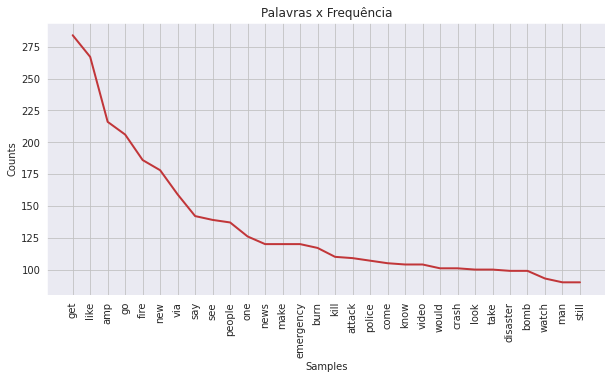

In [ ]:
tokens2 = []

for linha in df['text']:
  tokens2 += linha.split()

plt.figure(figsize=(10,5))
fd = nltk.FreqDist(tokens2)
fd.plot(30,title = "Palavras x Frequência")

#### Palavras mais comuns por Desastre Real ou Falso

Vamos criar outro df para cada tipo de tweet:

In [ ]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]

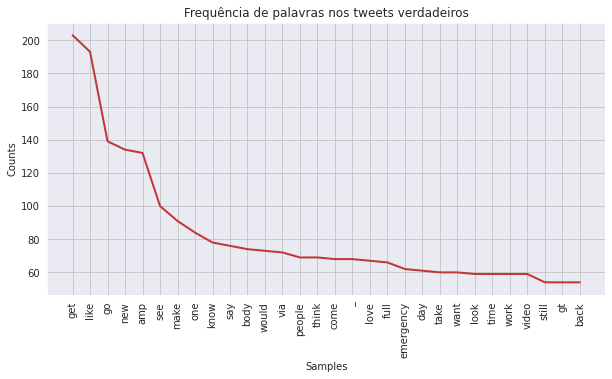

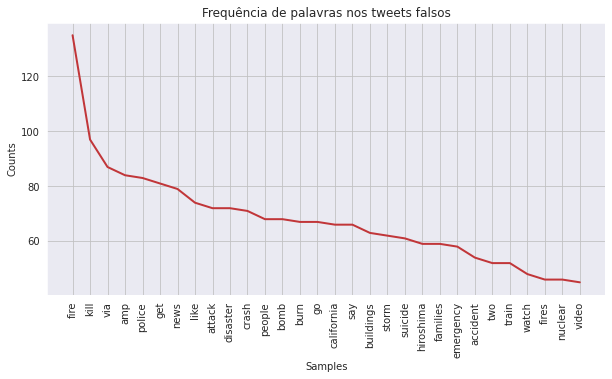

In [ ]:
tokens0 = []

for linha in df0['text']:
  tokens0 += linha.split()

plt.figure(figsize=(10,5))
fd = nltk.FreqDist(tokens0)
fd.plot(30,title = "Frequência de palavras nos tweets verdadeiros")

tokens1 = []

for linha in df1['text']:
  tokens1 += linha.split()

plt.figure(figsize=(10,5))
fd = nltk.FreqDist(tokens1)
fd.plot(30,title = "Frequência de palavras nos tweets falsos")

## Predição

#### Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split # para separar os dados em base de treino e teste

from sklearn.ensemble import RandomForestClassifier # modelo que vamos usar
from sklearn.naive_bayes import MultinomialNB #outro modelo que vamos usar
from sklearn.linear_model import LogisticRegression #outro modelo que vamos usar

from sklearn.metrics import accuracy_score, confusion_matrix # métricas para medir a performance do modelo
from sklearn.metrics import classification_report # para mais umas métricas

In [ ]:
vectorizer = CountVectorizer(max_features=5000) 
text = df['text']

In [ ]:
vectorizer.fit_transform(text)

<5080x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 37950 stored elements in Compressed Sparse Row format>

In [ ]:
x = vectorizer.transform(text)

In [ ]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Predição com RandomForest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, df['target'], test_size = 0.30, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(max_depth=3, random_state=0)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = random_forest.predict(x_test)

Acurácia:

In [ ]:
random_forest.score(x_test, y_test)

0.5885826771653543

Matriz de confusão:

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[884   0]
 [627  13]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       884
           1       1.00      0.02      0.04       640

    accuracy                           0.59      1524
   macro avg       0.79      0.51      0.39      1524
weighted avg       0.76      0.59      0.44      1524



#### Predição com Naive Bayes

In [ ]:
naive_bayes = MultinomialNB()

In [ ]:
naive_bayes.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
naive_bayes_pred = naive_bayes.predict(x_test)

Acurácia:

In [ ]:
accuracy_score(naive_bayes_pred, y_test)

0.7887139107611548

In [ ]:
print(classification_report(y_test, naive_bayes_pred)) #precision, recall, f1

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       884
           1       0.76      0.73      0.74       640

    accuracy                           0.79      1524
   macro avg       0.78      0.78      0.78      1524
weighted avg       0.79      0.79      0.79      1524



#### Predição com Regressão Logística

In [ ]:
clf = LogisticRegression(random_state=0)

In [56]:
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_pred = clf.predict(x_test)

In [ ]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       884
           1       0.74      0.65      0.70       640

    accuracy                           0.76      1524
   macro avg       0.76      0.75      0.75      1524
weighted avg       0.76      0.76      0.76      1524



### Word2Vec

In [ ]:
from gensim.models import KeyedVectors
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
twitter_embedding = KeyedVectors.load_word2vec_format('/content/drive/Shared drives/Grupo Turing/P&D/Áreas de Foco/NLP/Materiais/Aulas 2020/Aula Transfer Learning Word2Vec/word_embeddings/glove.twitter.27B.100d.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
twitter_embedding_layer = twitter_embedding.get_keras_embedding(train_embeddings=True)
twitter_embedding_layer(0)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 0.63006  ,  0.65177  ,  0.25545  ,  0.018593 ,  0.043094 ,
        0.047194 ,  0.23218  ,  0.11613  ,  0.17371  ,  0.40487  ,
        0.022524 , -0.076731 , -2.2911   ,  0.094127 ,  0.43293  ,
        0.041801 ,  0.063175 , -0.64486  , -0.43657  ,  0.024114 ,
       -0.082989 ,  0.21686  , -0.13462  , -0.22336  ,  0.39436  ,
       -2.1724   , -0.39544  ,  0.16536  ,  0.39438  , -0.35182  ,
       -0.14996  ,  0.10502  , -0.45937  ,  0.27729  ,  0.8924   ,
       -0.042313 , -0.009345 ,  0.55017  ,  0.095521 ,  0.070504 ,
       -1.1781   ,  0.013723 ,  0.17742  ,  0.74142  ,  0.17716  ,
        0.038468 , -0.31684  ,  0.08941  ,  0.20557  , -0.34328  ,
       -0.64303  , -0.878    , -0.16293  , -0.055925 ,  0.33898  ,
        0.60664  , -0.2774   ,  0.33626  ,  0.21603  , -0.11051  ,
        0.0058673, -0.64757  , -0.068222 , -0.77414  ,  0.13911  ,
       -0.15851  , -0.61885  , -0.10192  , -0.47     ,  0.19787  ,
        0.4217

In [ ]:
twitter_vocab_words = list(twitter_embedding.vocab.keys())

In [ ]:
def tokenize_sentece(sent):
    tokenized = word_tokenize(sent)
    tokenized = [token.lower() for token in tokenized if token.isalpha()]
    return tokenized

def tokenize_text(text):
    sentences = sent_tokenize(text)
    tokenized_senteces = [tokenize_sentece(sent) for sent in sentences]
    return tokenized_senteces

def build_vocab():
  i = 0
  vocab = {}

  for sent in sent_tokens:
    for token in sent:
      if token in word2vec_vocab_list:
        vocab[token] = i
      else:
        continue
      i+=1
  return vocab

In [ ]:
sent_tokens = df['text'].apply(tokenize_sentece)

In [ ]:
sent_tokens

31                   [bbcmtd, wholesale, markets, ablaze]
32                 [always, try, bring, heavy, metal, rt]
33      [africanbaze, break, news, nigeria, flag, set,...
34                                     [cry, set, ablaze]
35           [plus, side, look, sky, last, night, ablaze]
                              ...                        
7575                                [bright, side, wreck]
7577    [go, relax, think, wife, wreck, cake, goner, m...
7579    [three, days, work, pretty, much, wreck, hahah...
7580    [fx, forex, trading, cramer, iger, words, wrec...
7581    [engineshe, great, atmosphere, british, lion, ...
Name: text, Length: 5080, dtype: object

### Transformers

In [ ]:
!pip install transformers

In [ ]:
from transformers import TFAutoModel, AutoTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from keras.layers import Dense

Tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

In [ ]:
def bert_encode(tweets, Tokenizer, maximum_len):
  """
  Tokeniza, converte texto para id do vocabulário, constroi sequência e cria vetor com máscara de atenção.
  """
  input_ids = []
  attention_masks = []
  
  for tweet in tweets:
      encoded = Tokenizer.encode_plus(tweet,
                                      add_special_tokens=True,
                                      truncation=True,
                                      max_length=maximum_len,
                                      pad_to_max_length=True,
                                      return_attention_mask=True)
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
        
  return np.array(input_ids), np.array(attention_masks)

def mount_bert_input(tweets, targets, Tokenizer, maximum_len=128, test_size=0.3):
  features = bert_encode(tweets, Tokenizer, maximum_len)

  return features, targets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['target'], test_size = 0.10, random_state=42)

X_train, y_train = mount_bert_input(X_train, y_train, Tokenizer)
X_test, y_test = mount_bert_input(X_test, y_test, Tokenizer);

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss='binary_crossentropy')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['dropout_227', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_227 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
215/215 [==============================] - 172s 800ms/step - loss: 0.6150
Epoch 2/10
215/215 [==============================] - 174s 809ms/step - loss: 0.5200
Epoch 3/10
215/215 [==============================] - 174s 808ms/step - loss: 0.4718
Epoch 4/10
215/215 [==============================] - 174s 808ms/step - loss: 0.4335
Epoch 5/10
215/215 [==============================] - 173s 806ms/step - loss: 0.3993
Epoch 6/10
215/215 [==============================] - 173s 805ms/step - loss: 0.3539
Epoch 7/10
215/215 [==============================] - 173s 806ms/step - loss: 0.3305
Epoch 8/10
215/215 [==============================] - 173s 805ms/step - loss: 0.2992
Epoch 9/10
215/215 [==============================] - 173s 805ms/step - loss: 0.3353
Epoch 10/10
215/215 [==============================] - 172s 802ms/step - loss: 0.2227


In [ ]:
y_hat = model.predict(X_test)

In [ ]:
y_hat_bool = []
for i in y_hat[0]:
  y_hat_bool.append(i[0] > 0.5)

In [ ]:
accuracy_score(y_hat_bool, y_test)

0.8070866141732284